# Import

In [72]:
import pandas as pd
import quandl
# 基本のライブラリを読み込む
import numpy as np
from scipy import stats
import datetime
import urllib
import chardet
# グラフ描画
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

# グラフを横長にする
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# 統計モデル
import statsmodels.api as sm

from datetime import datetime as dt

## アップルの株価情報を取得(quandlで取得)

In [2]:

apple = quandl.get("WIKI/AAPL")

apple.columns
# Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
#        'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
#       dtype='object')

apple.shape#1980-12-12
# (9162, 12)

(9400, 12)

### 土日の補間(ランダムフォレスト用)

In [3]:
apple[:"2014-06-06"][["Open","High","Low","Close"]] = apple[:"2014-06-06"][["Open","High","Low","Close"]]/7

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [4]:
apple2 = pd.DataFrame(pd.date_range('2005-01-28', periods=4807, freq='D').date, columns=['Date'])
apple2["Date"] = pd.to_datetime(apple2["Date"])
apple2["date2"] = apple2["Date"]
apple2 = apple2.set_index("Date")
apple2
apple2 = pd.concat([apple2,apple],axis=1)
apple2 = apple2.iloc[0:13620].reset_index().set_index("Date")
apple2 = apple2.interpolate(method='linear')

In [5]:
apple2

,date2,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,,
1980-12-12,NaT,4.107143,4.124286,4.107143,4.107143,2.093900e+06,0.0,1.0,0.422706,0.424470,0.422706,0.422706,1.172584e+08
1980-12-15,NaT,3.911429,3.911429,3.892857,3.892857,7.852000e+05,0.0,1.0,0.402563,0.402563,0.400652,0.400652,4.397120e+07
1980-12-16,NaT,3.624286,3.624286,3.607143,3.607143,4.720000e+05,0.0,1.0,0.373010,0.373010,0.371246,0.371246,2.643200e+07
1980-12-17,NaT,3.695714,3.714286,3.695714,3.695714,3.859000e+05,0.0,1.0,0.380362,0.382273,0.380362,0.380362,2.161040e+07
1980-12-18,NaT,3.804286,3.821429,3.804286,3.804286,3.279000e+05,0.0,1.0,0.391536,0.393300,0.391536,0.391536,1.836240e+07
1980-12-19,NaT,4.035714,4.054286,4.035714,4.035714,2.171000e+05,0.0,1.0,0.415355,0.417266,0.415355,0.415355,1.215760e+07
1980-12-22,NaT,4.232857,4.250000,4.232857,4.232857,1.668000e+05,0.0,1.0,0.435644,0.437409,0.435644,0.435644,9.340800e+06
1980-12-23,NaT,4.411429,4.428571,4.411429,4.411429,2.096000e+05,0.0,1.0,0.454023,0.455787,0.454023,0.454023,1.173760e+07
1980-12-24,NaT,4.642857,4.661429,4.642857,4.642857,2.143000e+05,0.0,1.0,0.477841,0.479753,0.477841,0.477841,1.200080e+07


### 前日と比べて上がっているか下がっているか

In [6]:
apple2["difference"] = apple2["Close"]-apple["Close"].shift(1)
apple2["difference"] = apple2["difference"].apply(lambda x: 1.0 if x>0 else -1.0)
apple2[["Close","difference"]]

,Close,difference
Date,,
1980-12-12,4.107143,-1.0
1980-12-15,3.892857,-1.0
1980-12-16,3.607143,-1.0
1980-12-17,3.695714,1.0
1980-12-18,3.804286,1.0
1980-12-19,4.035714,1.0
1980-12-22,4.232857,1.0
1980-12-23,4.411429,1.0
1980-12-24,4.642857,1.0


## インテルの株価情報を取得

In [7]:

intel = quandl.get("WIKI/INTC")
intel.columns
# Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
#        'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
#       dtype='object')
intel.shape#1980-03-17

(9589, 12)

### 土日の補間(ランダムフォレスト用)

In [8]:
intel2 = pd.DataFrame(pd.date_range('2005-01-28', periods=4807, freq='D').date, columns=['Date'])
intel2["Date"] = pd.to_datetime(intel2["Date"])
intel2["date2"] = intel2["Date"]
intel2 = intel2.set_index("Date")
intel2
intel2 = pd.concat([intel2,intel],axis=1)
intel2 = intel2.iloc[0:13620].reset_index().set_index("Date")
intel2 = intel2.interpolate(method='linear')

In [9]:
intel2

,date2,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,,
1980-03-17,NaT,62.500000,63.500000,62.500000,62.500000,5.690000e+04,0.0,1.0,0.214892,0.218330,0.214892,0.214892,1.092480e+07
1980-03-18,NaT,62.500000,63.000000,62.000000,62.000000,8.890000e+04,0.0,1.0,0.214892,0.216611,0.213173,0.213173,1.706880e+07
1980-03-19,NaT,63.500000,64.500000,63.500000,63.500000,9.640000e+04,0.0,1.0,0.218330,0.221769,0.218330,0.218330,1.850880e+07
1980-03-20,NaT,63.500000,64.250000,63.250000,63.250000,5.820000e+04,0.0,1.0,0.218330,0.220909,0.217471,0.217471,1.117440e+07
1980-03-21,NaT,62.000000,62.000000,61.000000,61.000000,6.340000e+04,0.0,1.0,0.213173,0.213173,0.209735,0.209735,1.217280e+07
1980-03-24,NaT,60.750000,60.750000,59.750000,59.750000,4.670000e+04,0.0,1.0,0.208875,0.208875,0.205437,0.205437,8.966400e+06
1980-03-25,NaT,60.000000,61.000000,60.000000,60.000000,5.910000e+04,0.0,1.0,0.206296,0.209735,0.206296,0.206296,1.134720e+07
1980-03-26,NaT,60.000000,60.500000,59.500000,59.500000,8.470000e+04,0.0,1.0,0.206296,0.208016,0.204577,0.204577,1.626240e+07
1980-03-27,NaT,58.500000,58.500000,57.500000,57.500000,1.402000e+05,0.0,1.0,0.201139,0.201139,0.197701,0.197701,2.691840e+07


### 前日と比べて上がってるか下がってるか

In [10]:
intel2["difference"] = intel2["Close"]-intel2["Close"].shift(1)
intel2["difference"] = intel2["difference"].apply(lambda x: 1 if x>0 else -1)
intel2[["Close","difference"]]

,Close,difference
Date,,
1980-03-17,62.500000,-1
1980-03-18,62.000000,-1
1980-03-19,63.500000,1
1980-03-20,63.250000,-1
1980-03-21,61.000000,-1
1980-03-24,59.750000,-1
1980-03-25,60.000000,1
1980-03-26,59.500000,-1
1980-03-27,57.500000,-1


## 原油の株価情報を取得

In [11]:
wti = quandl.get("WIKI/WTI")
wti.columns
# Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
#        'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
#       dtype='object')
wti.shape#2005-01-28

(3312, 12)

### 土日の補間(ランダムフォレスト用)

In [12]:
wti2 = pd.DataFrame(pd.date_range('2005-01-28', periods=4807, freq='D').date, columns=['Date'])
wti2["Date"] = pd.to_datetime(wti2["Date"])
wti2["date2"] = wti2["Date"]
wti2 = wti2.set_index("Date")
wti2
wti2 = pd.concat([wti2,wti],axis=1)
wti2 = wti2.iloc[0:13620].reset_index().set_index("Date")
wti2 = wti2.interpolate(method='linear')

### 前日と比べて上がってるか下がってるか

In [13]:
wti2["difference"] = wti2["Close"]-wti2["Close"].shift(1)
wti2["difference"] = wti2["difference"].apply(lambda x: 1 if x>0 else -1)
wti2[["Close","difference"]]

,Close,difference
Date,,
2005-01-28,18.500000,-1
2005-01-29,18.400000,-1
2005-01-30,18.300000,-1
2005-01-31,18.200000,-1
2005-02-01,18.210000,1
2005-02-02,18.210000,-1
2005-02-03,18.250000,1
2005-02-04,18.200000,-1
2005-02-05,18.213333,1


## マイクロソフトの株価情報を取得

In [14]:
ms = quandl.get("WIKI/MSFT")
ms.columns
# Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
#        'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
#       dtype='object')
ms.shape#1986-03-13

(8076, 12)

### 土日の補間(ランダムフォレスト用)

In [15]:
ms2 = pd.DataFrame(pd.date_range('2005-01-28', periods=4807, freq='D').date, columns=['Date'])
ms2["Date"] = pd.to_datetime(ms2["Date"])
ms2["date2"] = ms2["Date"]
ms2 = ms2.set_index("Date")
ms2
ms2 = pd.concat([ms2,ms],axis=1)
ms2 = ms2.iloc[0:13620].reset_index().set_index("Date")
ms2 = ms2.interpolate(method='linear')

### 前日に上がってるか下がってるか

In [16]:
ms2["difference"] = ms2["Close"]-ms2["Close"].shift(1)
ms2["difference"] = ms2["difference"].apply(lambda x: 1 if x>0 else -1)
ms2[["Close","difference"]]

,Close,difference
Date,,
1986-03-13,28.000000,-1
1986-03-14,29.000000,1
1986-03-17,29.500000,1
1986-03-18,28.750000,-1
1986-03-19,28.250000,-1
1986-03-20,27.500000,-1
1986-03-21,26.750000,-1
1986-03-24,26.000000,-1
1986-03-25,26.500000,1


## SONYの株価(jsmで取得)

In [17]:
import jsm
c = jsm.QuotesCsv()

In [21]:
start_date = datetime.date(2005, 1, 28)
end_date = datetime.date(2018, 3, 27)
c.save_historical_prices('sony.csv',6758, jsm.DAILY, start_date, end_date) # 2005/1/28 〜 2018/3/27までの株価を取得

fig = plt.figure(figsize=(6,4))
name =['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj_close']
sony = pd.read_csv('sony.csv', names=name, parse_dates=['Date'], index_col='Date')
sony


,Open,High,Low,Close,Volume,Adj_close
Date,,,,,,
2018-03-27,5156.0,5233.0,5152.0,5232.0,7528700,5232.0
2018-03-26,5022.0,5079.0,4959.0,5079.0,7985600,5079.0
2018-03-23,5035.0,5138.0,5035.0,5096.0,10156100,5096.0
2018-03-22,5200.0,5275.0,5171.0,5239.0,9150000,5239.0
2018-03-20,5097.0,5144.0,5019.0,5138.0,8469200,5138.0
2018-03-19,5337.0,5337.0,5121.0,5144.0,11658900,5144.0
2018-03-16,5446.0,5450.0,5345.0,5371.0,7347000,5371.0
2018-03-15,5391.0,5462.0,5387.0,5446.0,6800900,5446.0
2018-03-14,5356.0,5418.0,5329.0,5400.0,7038900,5400.0


<Figure size 432x288 with 0 Axes>

### 土日の補間(ランダムフォレスト用)

In [22]:
sony2 = pd.DataFrame(pd.date_range('2005-01-28', periods=4807, freq='D').date, columns=['Date'])
sony2["Date"] = pd.to_datetime(sony2["Date"])
sony2["date2"] = sony2["Date"]
sony2 = sony2.set_index("Date")
sony2 = pd.concat([sony2,sony],axis=1)
sony2 = sony2.iloc[0:13620].reset_index().set_index("Date")
sony2 = sony2.interpolate(method='linear')

## AMAZONの株価(スクレイピング)

In [106]:
for i in range(1,159):
    url = 'https://stocks.finance.yahoo.co.jp/us/history/AMZN?sy=2005&sm=1&sd=2&ey=2018&em=1&ed=31&tm=d&start=&p='+str(i)
    if i==1:
        dfs = pd.read_html(url,header=0,encoding='utf-8')
        amzn = dfs[1]
    else:
        dfs = pd.read_html(url,header=0,encoding='utf-8')
        amzn = amzn.append(dfs[1])

amzn['Date'] = pd.to_datetime(amzn['日付'], format='%Y年%m月%d日')
amzn["Close"] = amzn["終値"]
amzn["Open"] = amzn["始値"]
amzn["High"] = amzn["高値"]
amzn["Low"] = amzn["安値"]
amzn = amzn.set_index("Date")
amzn = amzn[["Open","Low","High","Close"]]
amzn

,Open,Low,High,Close
Date,,,,
2018-01-31,1451.30,1450.04,1472.58,1450.89
2018-01-30,1403.17,1392.00,1439.25,1437.82
2018-01-29,1409.18,1400.44,1431.39,1417.68
2018-01-26,1392.01,1380.91,1402.53,1402.05
2018-01-25,1368.00,1357.62,1378.34,1377.95
2018-01-24,1374.82,1338.00,1388.16,1357.51
2018-01-23,1338.09,1337.34,1364.90,1362.54
2018-01-22,1297.17,1296.66,1327.45,1327.31
2018-01-19,1312.00,1292.99,1313.00,1294.58


### 土日の補間(ランダムフォレスト用)

In [108]:
amzn2 = pd.DataFrame(pd.date_range('2005-01-28', periods=4807, freq='D').date, columns=['Date'])
amzn2["Date"] = pd.to_datetime(amzn2["Date"])
amzn2["date2"] = amzn2["Date"]
amzn2 = amzn2.set_index("Date")
amzn2 = pd.concat([amzn2,amzn],axis=1)
amzn2 = amzn2.iloc[0:13620].reset_index().set_index("Date")
amzn2 = amzn2.interpolate(method='linear')

In [279]:
def donitihokan(x):
    y = pd.DataFrame(pd.date_range('2005-01-28', periods=4807, freq='D').date, columns=['Date'])
    y["Date"] = pd.to_datetime(y["Date"])
    y["date2"] = y["Date"]
    y = y.set_index("Date")
    y = pd.concat([y,x],axis=1)
    y = y.iloc[0:13620].reset_index().set_index("Date")
    y = y.interpolate(method='linear')
    return y

## ウォルマートの株価(スクレイピング)

In [270]:
def totonoeru(x):
    x['Date'] = pd.to_datetime(x['日付'], format='%Y年%m月%d日')
    x["Close"] = x["終値"]
    x["Open"] = x["始値"]
    x["High"] = x["高値"]
    x["Low"] = x["安値"]
    x = x.set_index("Date")
    x = x[["Open","Low","High","Close"]]
    return x

In [274]:
for i in range(1,159):
    url = 'https://stocks.finance.yahoo.co.jp/us/history/WMT?sy=2005&sm=1&sd=2&ey=2018&em=1&ed=31&tm=d&start=&p='+str(i)
    if i==1:
        dfs = pd.read_html(url,header=0,encoding='utf-8')
        wwt = dfs[1]
    else:
        dfs = pd.read_html(url,header=0,encoding='utf-8')
        wwt = wwt.append(dfs[1])

wwt = totonoeru(wwt)

In [280]:
wwt2 = donitihokan(wwt)
wwt2

,date2,Open,Low,High,Close
Date,,,,,
2005-01-28,2005-01-28,NaN,NaN,NaN,NaN
2005-01-29,2005-01-29,NaN,NaN,NaN,NaN
2005-01-30,2005-01-30,NaN,NaN,NaN,NaN
2005-01-31,2005-01-31,NaN,NaN,NaN,NaN
2005-02-01,2005-02-01,NaN,NaN,NaN,NaN
2005-02-02,2005-02-02,NaN,NaN,NaN,NaN
2005-02-03,2005-02-03,NaN,NaN,NaN,NaN
2005-02-04,2005-02-04,NaN,NaN,NaN,NaN
2005-02-05,2005-02-05,NaN,NaN,NaN,NaN


## ジョンソンエンドジョンソンの株価(スクレイピング)

In [281]:
for i in range(1,159):
    url = 'https://stocks.finance.yahoo.co.jp/us/history/JNJ?sy=2005&sm=1&sd=2&ey=2018&em=1&ed=31&tm=d&start=&p='+str(i)
    if i==1:
        dfs = pd.read_html(url,header=0,encoding='utf-8')
        jnj = dfs[1]
    else:
        dfs = pd.read_html(url,header=0,encoding='utf-8')
        jnj = jnj.append(dfs[1])

jnj = totonoeru(jnj)

jnj2 = donitihokan(jnj)
jnj2

,date2,Open,Low,High,Close
Date,,,,,
2005-01-28,2005-01-28,NaN,NaN,NaN,NaN
2005-01-29,2005-01-29,NaN,NaN,NaN,NaN
2005-01-30,2005-01-30,NaN,NaN,NaN,NaN
2005-01-31,2005-01-31,NaN,NaN,NaN,NaN
2005-02-01,2005-02-01,NaN,NaN,NaN,NaN
2005-02-02,2005-02-02,NaN,NaN,NaN,NaN
2005-02-03,2005-02-03,NaN,NaN,NaN,NaN
2005-02-04,2005-02-04,NaN,NaN,NaN,NaN
2005-02-05,2005-02-05,NaN,NaN,NaN,NaN


## ゴールドマンサックスの株価(スクレイピング)

In [287]:
for i in range(1,159):
    url = 'https://stocks.finance.yahoo.co.jp/us/history/GS?sy=2005&sm=1&sd=2&ey=2018&em=1&ed=31&tm=d&start=&p='+str(i)
    if i==1:
        dfs = pd.read_html(url,header=0,encoding='utf-8')
        gs = dfs[1]
    else:
        dfs = pd.read_html(url,header=0,encoding='utf-8')
        gs = gs.append(dfs[1])

gs = totonoeru(gs)
gs2 = donitihokan(gs)
gs2

,date2,Open,Low,High,Close
Date,,,,,
2005-01-28,2005-01-28,NaN,NaN,NaN,NaN
2005-01-29,2005-01-29,NaN,NaN,NaN,NaN
2005-01-30,2005-01-30,NaN,NaN,NaN,NaN
2005-01-31,2005-01-31,NaN,NaN,NaN,NaN
2005-02-01,2005-02-01,NaN,NaN,NaN,NaN
2005-02-02,2005-02-02,NaN,NaN,NaN,NaN
2005-02-03,2005-02-03,NaN,NaN,NaN,NaN
2005-02-04,2005-02-04,NaN,NaN,NaN,NaN
2005-02-05,2005-02-05,NaN,NaN,NaN,NaN


## マクドナルドの株価(スクレイピング)

In [288]:
for i in range(1,159):
    url = 'https://stocks.finance.yahoo.co.jp/us/history/MCD?sy=2005&sm=1&sd=2&ey=2018&em=1&ed=31&tm=d&start=&p='+str(i)
    if i==1:
        dfs = pd.read_html(url,header=0,encoding='utf-8')
        mcd = dfs[1]
    else:
        dfs = pd.read_html(url,header=0,encoding='utf-8')
        mcd = mcd.append(dfs[1])

mcd = totonoeru(mcd)
mcd2 = donitihokan(mcd)
mcd2

,date2,Open,Low,High,Close
Date,,,,,
2005-01-28,2005-01-28,NaN,NaN,NaN,NaN
2005-01-29,2005-01-29,NaN,NaN,NaN,NaN
2005-01-30,2005-01-30,NaN,NaN,NaN,NaN
2005-01-31,2005-01-31,NaN,NaN,NaN,NaN
2005-02-01,2005-02-01,NaN,NaN,NaN,NaN
2005-02-02,2005-02-02,NaN,NaN,NaN,NaN
2005-02-03,2005-02-03,NaN,NaN,NaN,NaN
2005-02-04,2005-02-04,NaN,NaN,NaN,NaN
2005-02-05,2005-02-05,NaN,NaN,NaN,NaN


# 基礎集計

In [45]:
apple[["Open","High","Low","Close"]]
intel[["Open","High","Low","Close"]]
wti[["Open","High","Low","Close"]]
ms[["Open","High","Low","Close"]]

,Open,High,Low,Close
Date,,,,
1986-03-13,25.500,29.2500,25.500,28.00
1986-03-14,28.000,29.5000,28.000,29.00
1986-03-17,29.000,29.7500,29.000,29.50
1986-03-18,29.500,29.7500,28.500,28.75
1986-03-19,28.750,29.0000,28.000,28.25
1986-03-20,28.250,28.2500,27.250,27.50
1986-03-21,27.500,28.0000,26.250,26.75
1986-03-24,26.750,26.7500,25.750,26.00
1986-03-25,26.000,26.5000,25.750,26.50


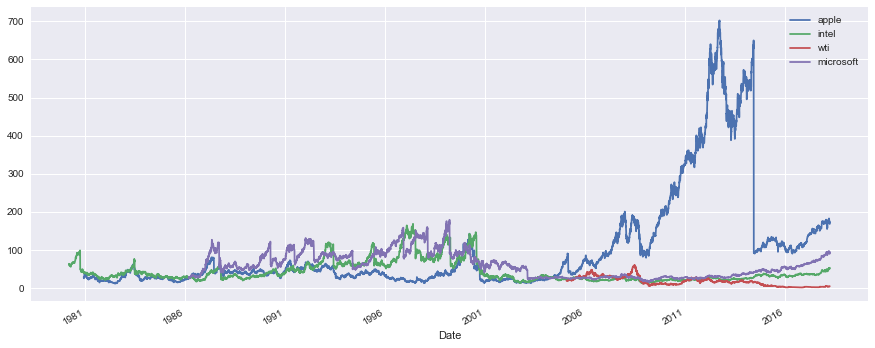

In [46]:
apple["Open"].plot(label="apple")
intel["Open"].plot(label="intel")
wti["Open"].plot(label="wti")
ms["Open"].plot(label="microsoft")
plt.legend()

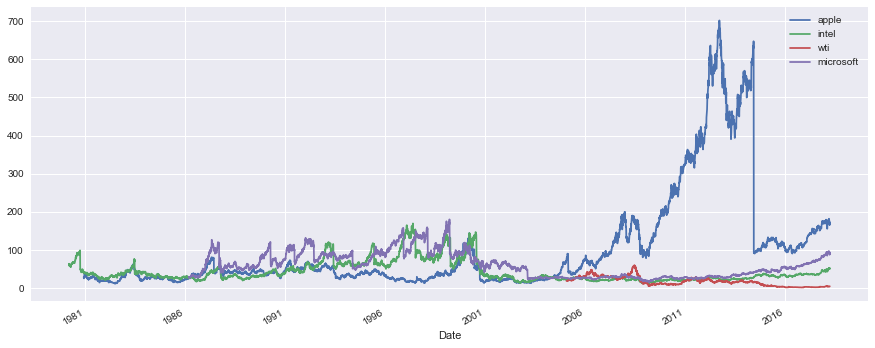

In [47]:
apple["Close"].plot(label="apple")
intel["Close"].plot(label="intel")
wti["Close"].plot(label="wti")
ms["Close"].plot(label="microsoft")
plt.legend()

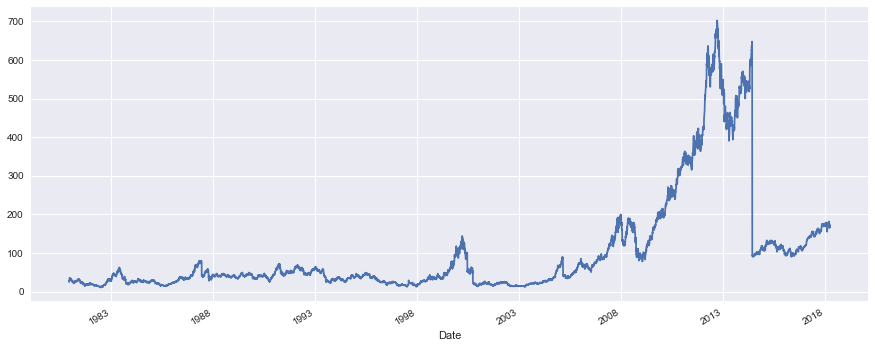

In [48]:
apple["Close"].plot(label="apple")

株式分割
2014年6月6日から2014年6月9日にかけて株式分割が発生

分割: 1株 -> 7株

株の分割比より、2014年6月6日以降の株価を1/7倍に変更

参照：
http://www.dera-matadora.com/entry/2018/02/02/%E6%A0%AA%E4%BE%A1%E9%81%8E%E5%8E%BB%E3%83%87%E3%83%BC%E3%82%BF%E5%88%86%E6%9E%90%E3%81%AB%E5%BF%85%E9%A0%88%EF%BC%9A%E6%A0%AA%E5%BC%8F%E5%88%86%E5%89%B2%E3%83%BB%E4%BD%B5%E5%90%88%E3%81%AB%E3%82%88

In [113]:
apple[:"2014-06-06"]["Close"] = apple[:"2014-06-06"]["Close"]/7

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


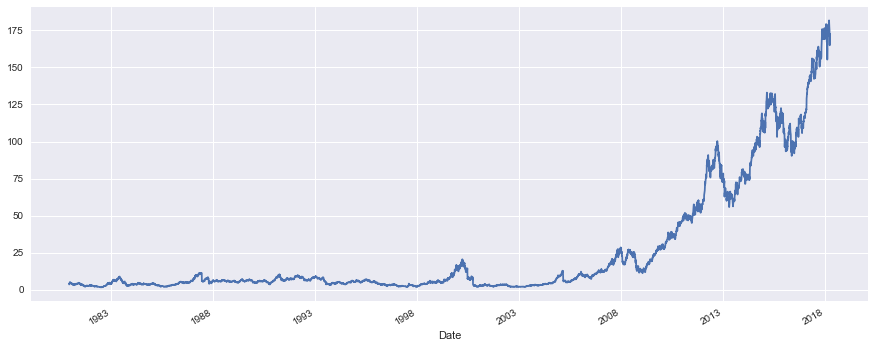

In [114]:
apple["Close"].plot(label="apple")
#休みの日

In [115]:
apple["Close"]["2018-02-02":"2018-02-05"]
#土日のデータがない

Date
2018-02-02    160.37
2018-02-05    157.49
Name: Close, dtype: float64

In [316]:
#使用するデータ
dataset = pd.DataFrame()



#dataset["apple_C"] = apple2["Close"]["2005-1-28":]
#dataset["apple_O"] = apple2["Open"]["2005-10-28":]
#dataset["apple_H"] = apple2["High"]["2005-10-28":]
#dataset["apple_L"] = apple2["Low"]["2005-10-28":]

dataset["intel_C"] = intel2["Close"]["2005-10-28":]
#dataset["intel_O"] = intel2["Open"]["2005-10-28":]
#dataset["intel_H"] = intel2["High"]["2005-10-28":]
#dataset["intel_L"] = intel2["Low"]["2005-10-28":]

dataset["wti_C"] = wti2["Close"]["2005-10-28":]
#dataset["wti_O"] = wti2["Open"]["2005-10-28":]
#dataset["wti_H"] = wti2["High"]["2005-10-28":]
#dataset["wti_L"] = wti2["Low"]["2005-10-28":]

dataset["ms_C"] = ms2["Close"]["2005-10-28":]
#dataset["ms_O"] = ms2["Open"]["2005-10-28":]
#dataset["ms_H"] = ms2["High"]["2005-10-28":]
#dataset["ms_L"] = ms2["Low"]["2005-10-28":]

dataset["sony_C"] = sony2["Close"]["2005-10-28":]
#dataset["sony_O"] = sony2["Open"]["2005-10-28":]
#dataset["sony_H"] = sony2["High"]["2005-10-28":]
#dataset["sony_L"] = sony2["Low"]["2005-10-28":]

dataset["amzn_C"] = amzn2["Close"]["2005-10-28":]
#dataset["amzn_O"] = amzn2["Open"]["2005-10-28":]
#dataset["amzn_H"] = amzn2["High"]["2005-10-28":]
#dataset["amzn_L"] = amzn2["Low"]["2005-10-28":]

dataset["wwt_C"] = wwt2["Close"]["2005-10-28":]
#dataset["wwt_O"] = wwt2["Open"]["2005-10-28":]
#dataset["wwt_H"] = wwt2["High"]["2005-10-28":]
#dataset["wwt_L"] = wwt2["Low"]["2005-10-28":]

dataset["jnj_C"] = jnj2["Close"]["2005-10-28":]
#dataset["jnj_O"] = jnj2["Open"]["2005-10-28":]
#dataset["jnj_H"] = jnj2["High"]["2005-10-28":]
#dataset["jnj_L"] = jnj2["Low"]["2005-10-28":]

dataset["gs_C"] = gs2["Close"]["2005-10-28":]
#dataset["gs_O"] = gs2["Open"]["2005-10-28":]
#dataset["gs_H"] = gs2["High"]["2005-10-28":]
#dataset["gs_L"] = gs2["Low"]["2005-10-28":]

#dataset["mcd_C"] = mcd2["Close"]["2005-10-28":]
#dataset["mcd_O"] = mcd2["Open"]["2005-10-28":]
#dataset["mcd_H"] = mcd2["High"]["2005-10-28":]
#dataset["mcd_L"] = mcd2["Low"]["2005-10-28":]

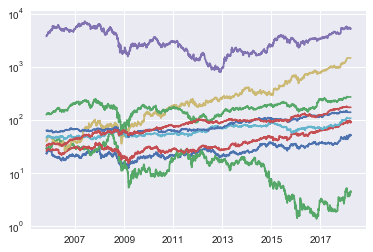

In [307]:
plt.yscale("log")
plt.plot(dataset[["intel_C","wti_C","ms_C","sony_C","amzn_C","wwt_C","jnj_C","gs_C","mcd_C"]])
plt.legend()

## 土日のデータの補間

平均移動誤差
線形補完

In [219]:
dt.strptime('2018-03-27', '%Y-%m-%d')-dt.strptime('2005-01-28', '%Y-%m-%d')#日数差を算出

datetime.timedelta(4806)

### 土日の日付のインデックスを作成(値はNULL)

In [117]:
apple3 = pd.DataFrame(pd.date_range('1980-12-12', periods=13620, freq='D').date, columns=['Date'])
apple3["Date"] = pd.to_datetime(apple3["Date"])
apple3["date2"] = apple3["Date"]
apple3 = apple3.set_index("Date")
apple3
apple3 = pd.concat([apple3,apple["Close"]],axis=1)
apple3 = apple3.iloc[0:13620]["Close"].reset_index().set_index("Date")

### NULLの個所を線形補完

In [118]:
apple3 = apple3.interpolate(method='linear')

## 自己相関

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: invalid value encountered in multiply
  c *= 1. / np.float64(fact)


nan


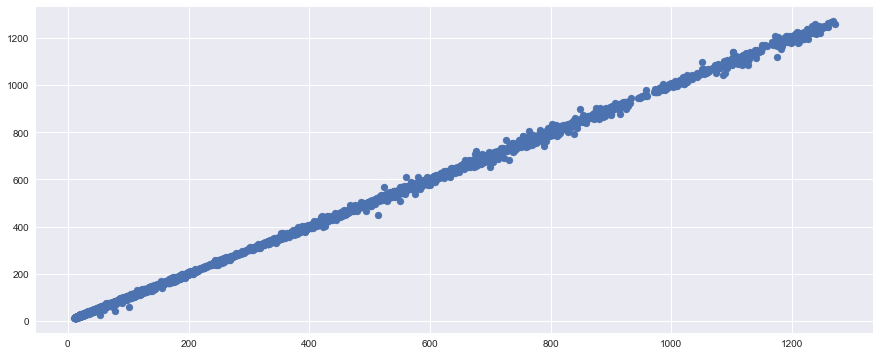

In [56]:
#前日との自己相関
#前日の影響をとても強く受けている
data = [plt.scatter(x=apple3[:-1], y=apple3[1:])]
corr = np.corrcoef(apple3[:-1], apple3[1:])[0][1]
print(corr)
#fig = plt.figure(data=data, layout=Layout(title='ラグ1の散布図(corr={:.2})'.format(corr)))
#iplot(fig)

In [57]:
# 自己相関を求める
apple_acf = sm.tsa.stattools.acf(apple3, nlags=40)
print(apple_acf)

[1.         0.99940723 0.99876705 0.99814063 0.99752938 0.99693524
 0.99632013 0.99568238 0.99501929 0.99436056 0.99369264 0.99301683
 0.99233255 0.99164941 0.99096556 0.99026801 0.9895612  0.98886305
 0.98817254 0.98748865 0.98682528 0.98616384 0.98548781 0.98481366
 0.98414387 0.98347628 0.98280879 0.98214674 0.98145935 0.98076365
 0.98006772 0.9793787  0.97870036 0.97803254 0.97739013 0.97675954
 0.97612319 0.97549019 0.97485733 0.97422354 0.97358502]


In [58]:
# 偏自己相関
apple_pacf = sm.tsa.stattools.pacf(apple3, nlags=40, method='ols')
print(apple_pacf)

[ 1.00000000e+00  1.00037609e+00 -8.75100456e-02 -1.04292122e-02
 -8.34386934e-03  2.22037652e-03  2.95509209e-02 -3.68101937e-02
  1.32428815e-02  2.46925413e-02 -1.85548441e-02 -5.20322816e-03
 -1.25975947e-02  3.33708404e-02 -1.44822684e-02 -1.82301857e-02
  1.90171813e-02  2.46629850e-02  1.87570840e-02  8.89022474e-03
 -1.28171917e-03 -5.35352634e-02 -8.98657254e-03  2.04083510e-02
  1.72895803e-02  4.99875182e-03 -9.37595367e-03 -1.02413724e-02
 -1.76133799e-02 -3.29109597e-02  2.87551311e-02 -3.84868483e-03
  2.03504719e-02  1.07656637e-02  2.73503547e-02  1.02274832e-02
 -7.66126430e-03  2.13765618e-02  2.22685793e-03  7.58716386e-04
 -1.67365202e-02]


# SARIMAモデル

ARIMAモデル(自己回帰和分移動平均モデル)
AR(自己回帰モデル)
MA(移動平均モデル)
I(和分過程)
を組み合わせたもの。
ある時系列データに対して,「d回差分」を取った定常的なデータは，「p個以前の過去の値」と「q個以前のノイズの値」によって現在の値を記述することができるモデル
このモデルは、ARIMA(p,d,q)と記述される。

目的変数説明変数の作成

In [120]:
X_dataset1 = apple3["2008-03-27":"2018-03-27"]

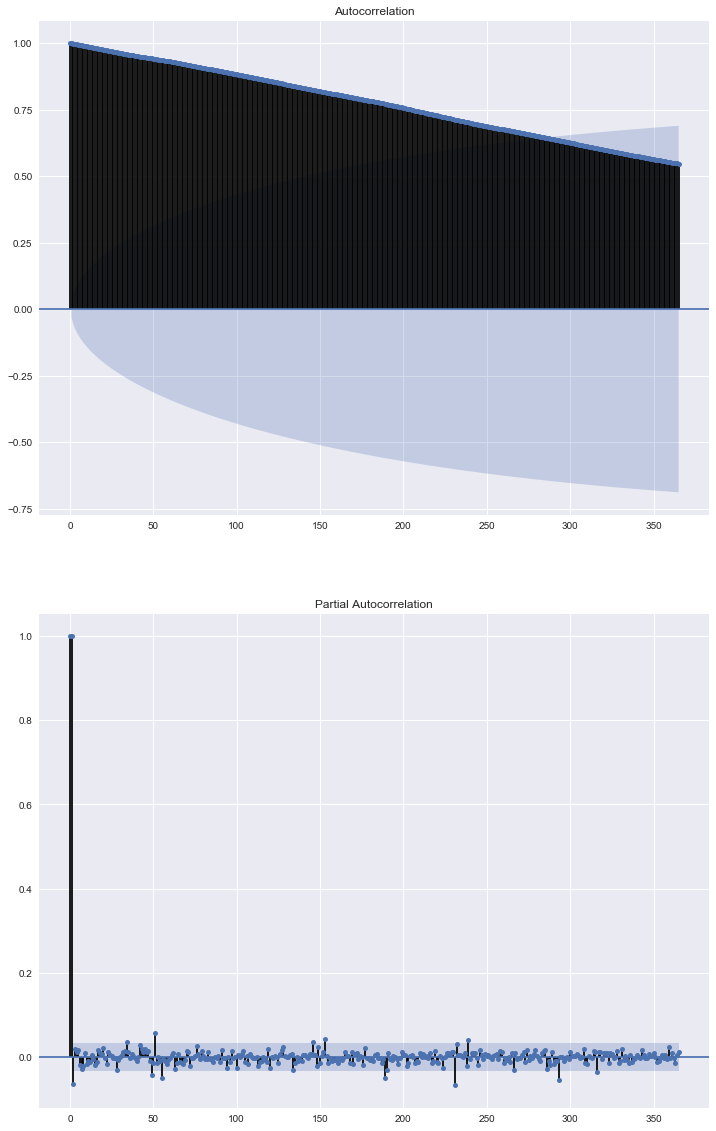

In [121]:
#  自己相関のグラフ

fig = plt.figure(figsize=(12,20))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(X_dataset1, lags=365, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(X_dataset1, lags=365, ax=ax2)

周期60日にあると考える

In [122]:
#
diff = X_dataset1.diff()
diff = diff.dropna()

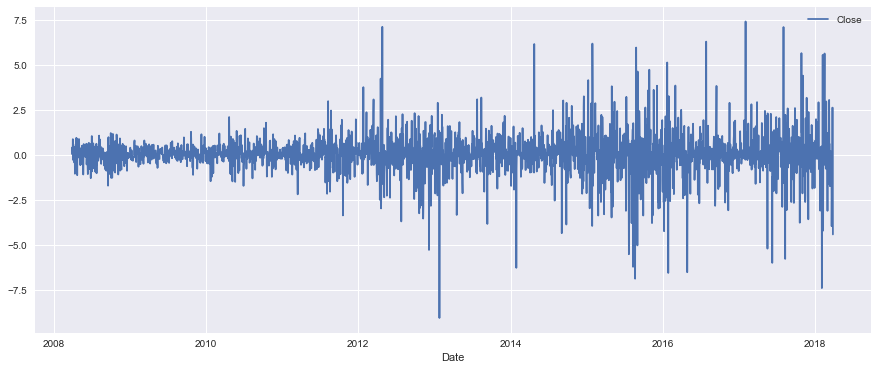

In [123]:
diff.plot()

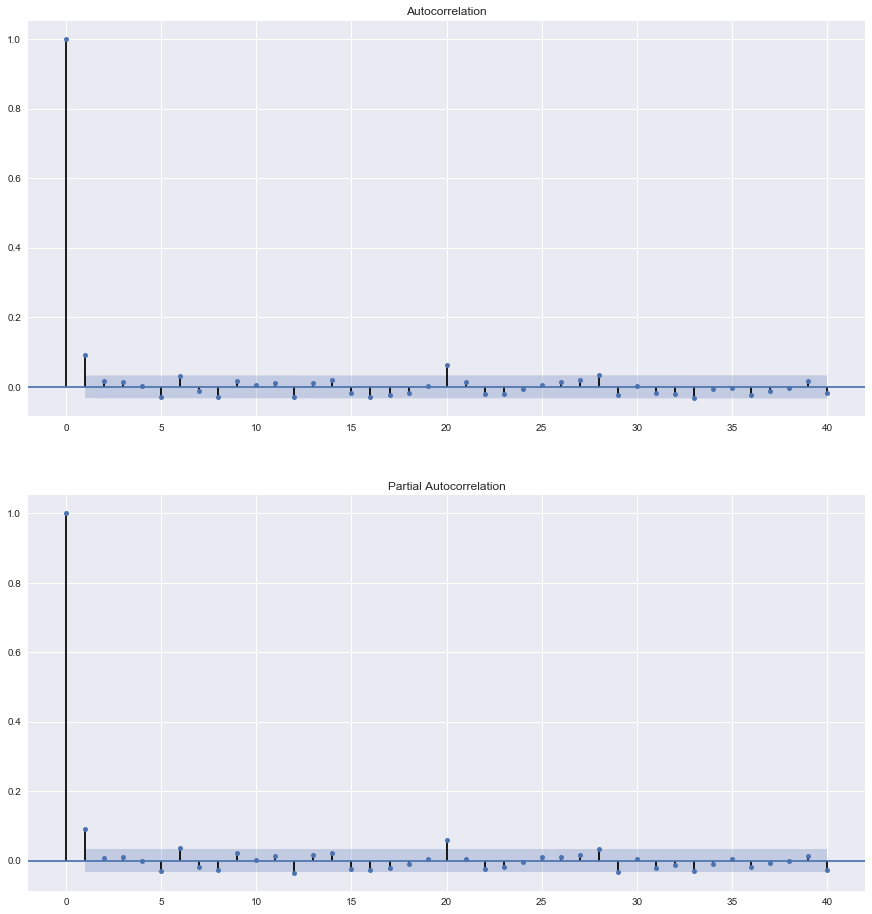

In [124]:
# Graph data
fig, axes = plt.subplots(2, 1, figsize=(15,16))

fig = sm.graphics.tsa.plot_acf(diff, lags=40, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(diff, lags=40, ax=axes[1])

In [125]:
# 差分系列への自動ARMA推定関数の実行
resDiff = sm.tsa.arma_order_select_ic(diff, ic='aic', trend='nc')
resDiff

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % 

{'aic':               0             1             2
 0           NaN  10433.332787  10434.532519
 1  10432.599247  10434.215822  10436.042016
 2  10434.310732  10436.091030  10437.939075
 3  10435.739655  10437.739503  10423.054666
 4  10437.738791  10437.534766  10425.049843, 'aic_min_order': (3, 2)}

ARIMA(3, 1, 2)

## 季節変動性の時数を決め打ちで実行

In [126]:
# SARIMAモデルを「決め打ち」で推定する
sarima = sm.tsa.SARIMAX(diff, order=(3,1,2), trend='ct').fit()
print(sarima.summary())

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:                  Close   No. Observations:                 3652
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -5361.027
Date:                Thu, 30 Aug 2018   AIC                          10738.054
Time:                        10:33:21   BIC                          10787.676
Sample:                    03-28-2008   HQIC                         10755.725
                         - 03-27-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.018      0.016      0.987      -0.035       0.036
drift      -6.143e-07    6.8e-06     -0.090      0.928   -1.39e-05    1.27e-05
ar.L1         -0.8425      0.162     -5.210      0.0

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


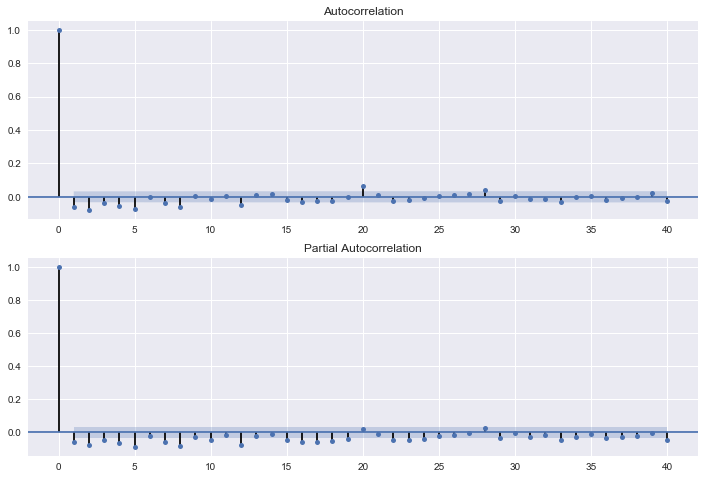

In [127]:
# 残差のチェック
residSARIMA = sarima.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(residSARIMA.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(residSARIMA, lags=40, ax=ax2)

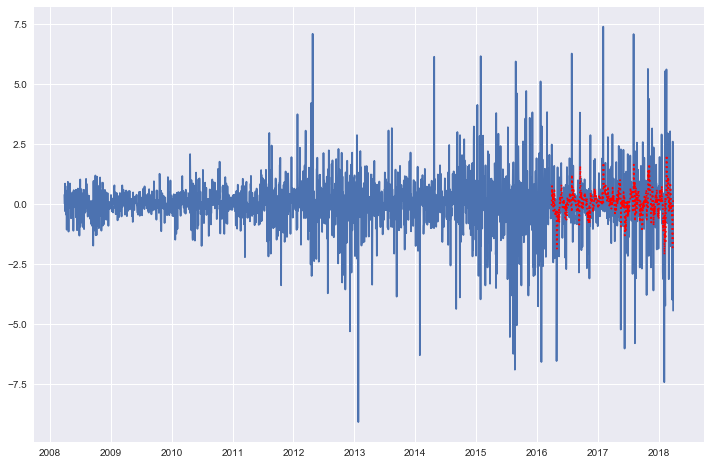

In [128]:
# 予測
pred = sarima.predict("2016-03-27","2018-03-27")

# 実データと予測結果の図示
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(diff["2008-03-27":"2018-03-27"])
ax.plot(pred["2016-03-27":"2018-03-27"], "r:")# 

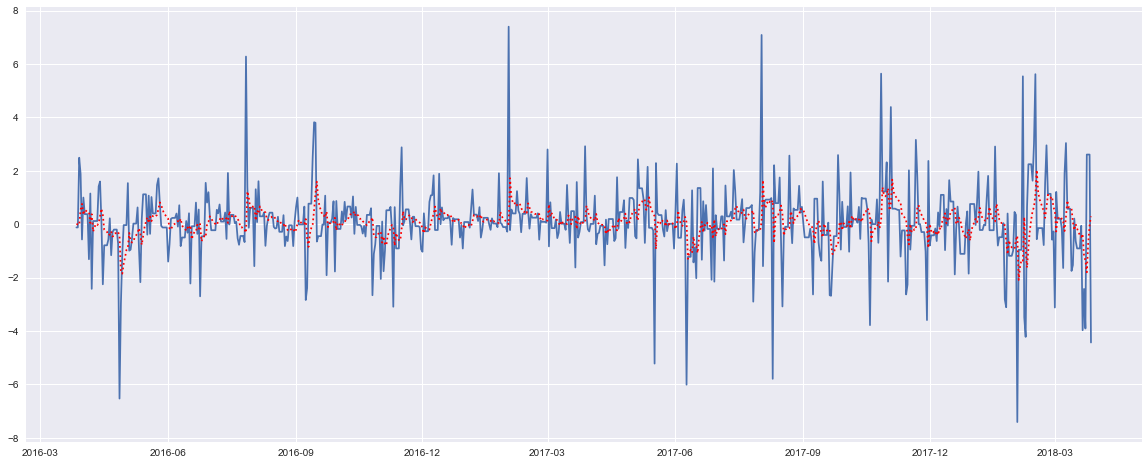

In [129]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(diff["2016-03-27":"2018-03-27"])

ax.plot(pred["2016-03-27":"2018-03-27"], "r:")# 

In [130]:
dt.strptime("2018-03-27", '%Y-%m-%d')-dt.strptime('2016-03-27', '%Y-%m-%d')

datetime.timedelta(730)

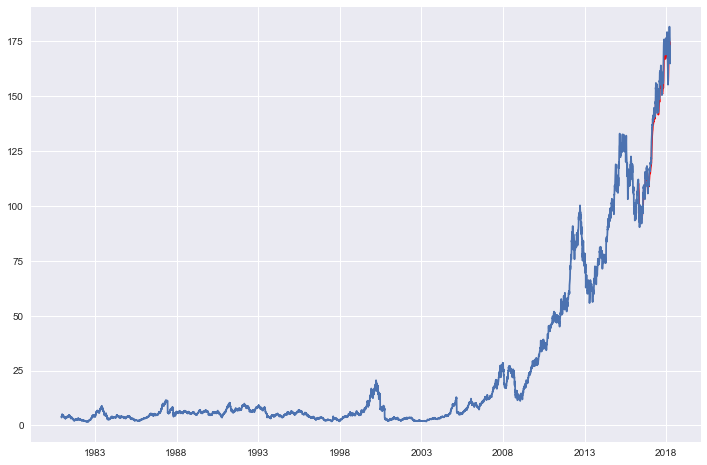

In [131]:

origin_day = datetime.date.today()
#kekka = pd.DataFrame()
kekka = pd.DataFrame(pd.date_range('2016-03-27', periods=366, freq='D').date, columns=['Date'])
kekka = kekka.set_index("Date")
kekka["close"] = 0
kekka.loc[dt.strptime('2016-03-27', '%Y-%m-%d').date()] = float(apple3.loc["2016-03-26"]+pred.loc["2017-03-27"])
#print(kekka)
for day in (dt.strptime('2016-03-28', '%Y-%m-%d') + datetime.timedelta(x) for x in range(730)):
    kekka.loc[day.date()] = kekka.loc[(day - datetime.timedelta(days = 1)).date()] + pred.loc[day.date()]
    #print(pred.loc["{0:%Y-%m-%d}".format(day)])
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(kekka,"r")
ax.plot(apple3)

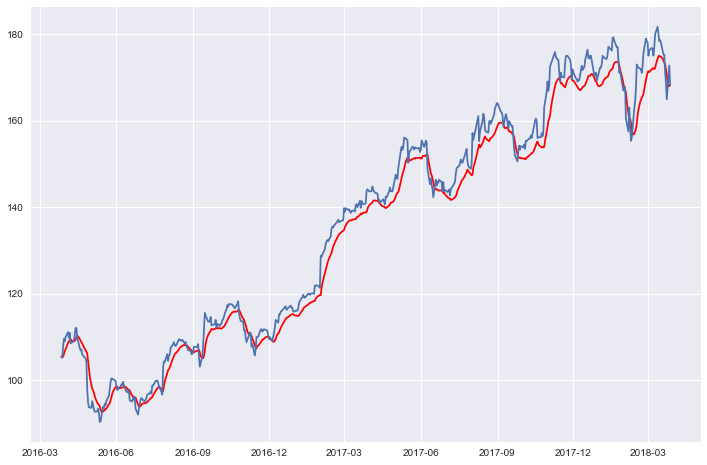

In [132]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(kekka,"r")
ax.plot(apple3["2016-03-27":"2018-03-27"])

## 精度評価

In [185]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 平均二乗誤差

In [134]:
mean_squared_error(apple3["2016-03-27":"2018-03-27"],kekka)

13.812079781468222

### RMSE

In [135]:
np.sqrt(mean_squared_error(apple3["2016-03-27":"2018-03-27"],kekka))

3.716460652484864

### 決定係数

In [136]:
r2_score(apple3["2016-03-27":"2018-03-27"],kekka)  

0.9813137748347893

# Random Forest回帰

In [24]:
# クラス読み込み
from sklearn.ensemble import RandomForestRegressor

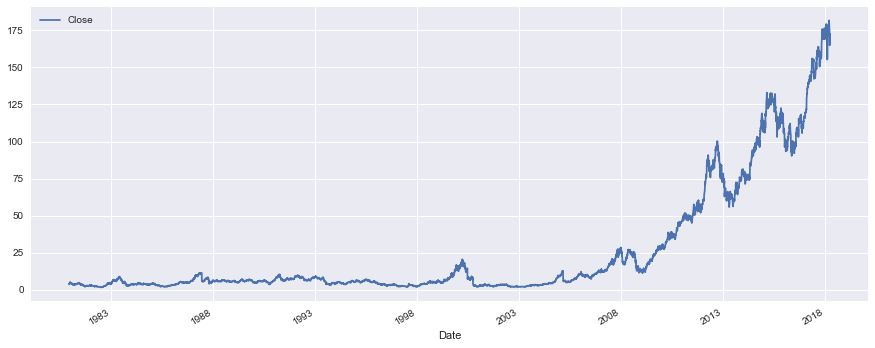

In [56]:
apple2[["Close"]].plot()

In [224]:
# 欠損値の有無を確認
dataset.isnull().any() # 欠損値があるか確認

apple_O    False
apple_H    False
apple_L    False
intel_C    False
intel_O    False
intel_H    False
intel_L    False
wti_C      False
wti_O      False
wti_H      False
wti_L      False
ms_C       False
ms_O       False
ms_H       False
ms_L       False
sony_C     False
sony_O     False
sony_H     False
sony_L     False
amzn_C     False
amzn_O     False
amzn_H     False
amzn_L     False
dtype: bool

## モデリング用のデータの準備

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression

In [54]:
"""重要な変数をk個選んでくれるコード
X = dataset
y = apple2["Close"]["2005-1-28":]

selector = SelectKBest(score_func=f_regression, k=15)
selector.fit(X, y)
mask = selector.get_support()    # 各特徴量を選択したか否かのmaskを取得
print(pd.Series(dataset.columns)[mask])#選ばれし変数たち
#print(mask)

# 選択した特徴量の列のみ取得
X_selected = selector.transform(X)
print("X.shape={}, X_selected.shape={}".format(X.shape, X_selected.shape))"""

'重要な変数をk個選んでくれるコード\nX = dataset\ny = apple2["Close"]["2005-1-28":]\n\n# 5つの特徴量を選択\nselector = SelectKBest(score_func=f_regression, k=15)\nselector.fit(X, y)\nmask = selector.get_support()    # 各特徴量を選択したか否かのmaskを取得\nprint(pd.Series(dataset.columns)[mask])\n#print(mask)\n\n# 選択した特徴量の列のみ取得\nX_selected = selector.transform(X)\nprint("X.shape={}, X_selected.shape={}".format(X.shape, X_selected.shape))'

In [32]:
"""自動的に訓練データとテストデータに分割
# --- 訓練データとテストデータに分割 ------

# 特徴量と目的変数に分ける
X_dataset = dataset
y_dataset = apple2["Close"]["2005-1-28":]

# 特徴量名を取り出しておく
feature_x_dataset = dataset.columns
feature_y_dataset = y_dataset.name

# 学習データと評価データに分ける
X_dataset_train, X_dataset_test, y_dataset_train, y_dataset_test = train_test_split(X_dataset, y_dataset, test_size=0.2, random_state=0) 
print("shape of X and y for training: ", X_dataset_train.shape, y_dataset_train.shape)
print("shape of X and y for testing: ", X_dataset_test.shape, y_dataset_test.shape)"""

shape of X and y for training:  (3845, 19) (3845,)
shape of X and y for testing:  (962, 19) (962,)


In [259]:
#時系列の範囲で訓練データとテストデータを分割
X_dataset = dataset
y_dataset = apple2["Close"]["2005-10-28":]

X_dataset_train = dataset["2005-10-28":"2015-10-28"]
y_dataset_train = apple2["Close"]["2005-10-29":"2015-10-29"]
# 特徴量名を取り出しておく
feature_x_dataset = dataset.columns

X_dataset_test = dataset["2015-11-28":"2015-12-28"]
y_dataset_test = apple2["Close"]["2015-11-29":"2015-12-29"]
X_dataset_test2 = dataset["2015-10-28":"2015-11-28"]
y_dataset_test2 = apple2["Close"]["2015-10-29":"2015-11-29"]

In [317]:
#クロスバリエーション
X_train, X_test, y_train, y_test = cross_validation.train_test_split(dataset["2005-10-28":"2015-10-28"], apple2["Close"]["2005-10-29":"2015-10-29"], test_size=0.4, random_state=0)

In [318]:
feature_x_dataset = dataset.columns

## グリッドサーチ

In [320]:
# 必要なライブラリのインポート
from sklearn.grid_search import GridSearchCV

# 動かすパラメータを明示的に表示、今回は決定木の数を変えてみる
param_grid = { 
    'n_estimators': [ 400, 800,1000,1200],#木の数
    'max_depth' : [4,6,8,10,15,20,25], #木の深さ
    'max_features': ['auto', 'sqrt', 'log2'],# 
    'criterion': ['mse']#
}

# ハイパーパラメータ探索
cv = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, scoring = 'mean_squared_error', n_jobs =1 )
cv.fit(X_train, y_train)

cv.best_params_

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\U

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\U

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\U

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\U

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\U

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\U

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\U

C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\ko_natsuhara\Anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\U

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'log2',
 'n_estimators': 1200}

## 学習

In [321]:
clf_rf = RandomForestRegressor(random_state=0
                                , criterion= 'mse', max_depth = 25, max_features = 'auto', n_estimators = 800
                               )
clf_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [322]:
# 変数重要度の降順
importance = pd.Series(clf_rf.feature_importances_, index=feature_x_dataset)
importance.sort_values(ascending=False)

amzn_C     0.776207
ms_C       0.149290
wwt_C      0.031592
sony_C     0.024301
intel_C    0.011098
wti_C      0.003242
gs_C       0.002535
jnj_C      0.001735
dtype: float64

## 予測

In [323]:
y_train2 = clf_rf.predict(X_train) 
y_pred = clf_rf.predict(X_test)


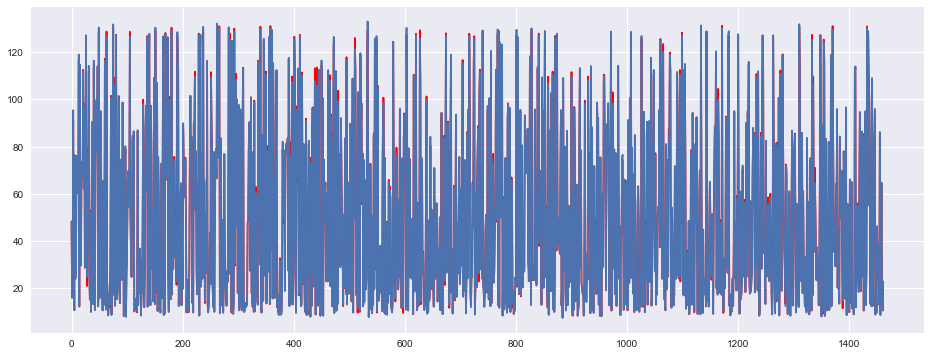

In [324]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(y_pred,"r")
ax.plot(y_test.values)


## 精度確認

In [325]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("訓練データ")
print("決定係数")
print(r2_score(y_train2, y_train))
print("平均二乗誤差")
print(mean_squared_error(y_train2, y_train))
print("")

print("テストデータ")
print("決定係数")
print(r2_score(y_pred, y_test))
print("平均二乗誤差")
print(mean_squared_error(y_pred, y_test))


訓練データ
決定係数
0.9996514877128896
平均二乗誤差
0.4215073705674003

テストデータ
決定係数
0.9987523407864659
平均二乗誤差
1.6458550589586898
